In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [9]:
import sys
sys.path.insert(0, 'AnalysisCode')

from ImageAnalysis import ImageAnalysisCode

# Read Binary Files

In [ ]:
ZylaFilePath = '/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/Data/2024/11-2024/11 Nov 2024/Andor/ODT temp MF waveplate 220/0100000000spool.dat'

In [ ]:
with open(ZylaFilePath, 'rb') as f:
    cont = f.read()

In [ ]:
type(cont)

bytes

In [ ]:
np.frombuffer(cont)

array([8.75109313e-303, 1.13028245e-302, 1.09383129e-302, ...,
       2.54639495e-313, 4.16492895e-273, 2.54639495e-313])

In [ ]:
np.frombuffer(cont, dtype=np.uint16)

array([300, 323, 314, ...,   0,  12,   0], dtype=uint16)

In [ ]:
np.frombuffer(cont, dtype=np.uint8)

array([44,  1, 67, ...,  0,  0,  0], dtype=uint8)

In [21]:
# One line solution for all above
np.fromfile(ZylaFilePath, dtype=np.uint16)

array([300, 323, 314, ...,   0,  12,   0], dtype=uint16)

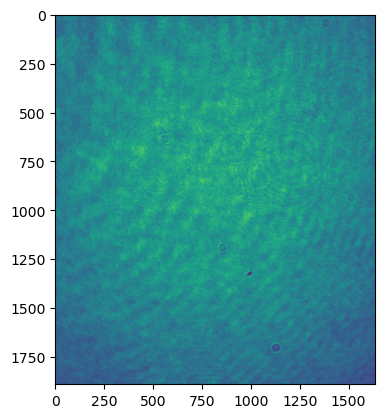

In [20]:
H = 1890 
W = 1634

with open(ZylaFilePath, 'rb') as f:
    cont = f.read()

img = np.fromfile(ZylaFilePath, dtype=np.uint16)[0: H*W].reshape(H, W)
plt.imshow(img)

# Pandas

In [ ]:
pd.__version__

'2.1.4'

In [5]:
with open(path, 'rb') as f:
    df = pickle.load(f)

TypeError: Argument 'placement' has incorrect type (expected pandas._libs.internals.BlockPlacement, got slice)

In [ ]:
!pandas -V

/bin/bash: line 1: pandas: command not found


In [8]:
df = pd.read_pickle(path)
df.head()

,FirstImg,PPI,SkipFI,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,...,HF_AOM_Freq,HF_AOM_V,LowServo0,LowServo1,p,Evap_time_step,Lens_Position,q,Unitarity_Tau,Evap_timestep
time,,,,,,,,,,,,,,,,,,,,,
2024-08-30 13:59:09.927292,0000000000spool.dat,4,1,0.0,48.0,5.0,512.0,2415.44,3.598,226.0,...,314.0,7.526738,7.0,0.25,-1.446154,NaN,430.0,3.241379,3.503114,1.0
2024-08-30 13:59:20.605443,4000000000spool.dat,4,1,1.0,48.0,5.0,512.0,2415.44,3.598,226.0,...,314.0,7.526738,7.0,0.25,-1.446154,NaN,430.0,3.241379,3.503114,1.5
2024-08-30 13:59:31.970745,8000000000spool.dat,4,1,2.0,48.0,5.0,512.0,2415.44,3.598,226.0,...,314.0,7.526738,7.0,0.25,-1.446154,NaN,430.0,3.241379,3.503114,0.5
2024-08-30 13:59:41.453950,2100000000spool.dat,4,1,3.0,48.0,5.0,512.0,2415.44,3.598,226.0,...,314.0,7.526738,7.0,0.25,-1.446154,NaN,430.0,3.241379,3.503114,2.0
2024-08-30 13:59:52.694055,6100000000spool.dat,4,1,4.0,48.0,5.0,512.0,2415.44,3.598,226.0,...,314.0,7.526738,7.0,0.25,-1.446154,NaN,430.0,3.241379,3.503114,0.1


In [20]:
df1 = df.iloc[:10, :3]
df1

,FirstImg,PPI,SkipFI
time,,,
2024-08-30 13:59:09.927292,0000000000spool.dat,4,1
2024-08-30 13:59:20.605443,4000000000spool.dat,4,1
2024-08-30 13:59:31.970745,8000000000spool.dat,4,1
2024-08-30 13:59:41.453950,2100000000spool.dat,4,1
2024-08-30 13:59:52.694055,6100000000spool.dat,4,1
2024-08-30 14:00:01.642363,0200000000spool.dat,4,1
2024-08-30 14:00:13.348126,4200000000spool.dat,4,1
2024-08-30 14:00:23.367875,8200000000spool.dat,4,1
2024-08-30 14:00:34.078102,2300000000spool.dat,4,1


In [22]:
df1.shape

(10, 3)

In [67]:
df1.iloc[2,1] = np.nan
df1

,FirstImg,PPI,SkipFI
time,,,
2024-08-30 13:59:09.927292,0000000000spool.dat,4.0,1.0
2024-08-30 13:59:20.605443,4000000000spool.dat,4.0,1.0
2024-08-30 13:59:31.970745,8000000000spool.dat,NaN,1.0
2024-08-30 13:59:41.453950,2100000000spool.dat,4.0,1.0
2024-08-30 13:59:52.694055,6100000000spool.dat,4.0,1.0
2024-08-30 14:00:01.642363,0200000000spool.dat,4.0,100.0
2024-08-30 14:00:13.348126,4200000000spool.dat,4.0,NaN
2024-08-30 14:00:23.367875,8200000000spool.dat,4.0,NaN
2024-08-30 14:00:34.078102,2300000000spool.dat,4.0,1.0


In [72]:
df1.dropna(axis=0,
        #    subset=['PPI'],
           how='all')

,FirstImg,PPI,SkipFI
time,,,
2024-08-30 13:59:09.927292,0000000000spool.dat,4.0,1.0
2024-08-30 13:59:20.605443,4000000000spool.dat,4.0,1.0
2024-08-30 13:59:31.970745,8000000000spool.dat,NaN,1.0
2024-08-30 13:59:41.453950,2100000000spool.dat,4.0,1.0
2024-08-30 13:59:52.694055,6100000000spool.dat,4.0,1.0
2024-08-30 14:00:01.642363,0200000000spool.dat,4.0,100.0
2024-08-30 14:00:13.348126,4200000000spool.dat,4.0,NaN
2024-08-30 14:00:23.367875,8200000000spool.dat,4.0,NaN
2024-08-30 14:00:34.078102,2300000000spool.dat,4.0,1.0


In [73]:
df1.select_dtypes(include='number')

,PPI,SkipFI
time,,
2024-08-30 13:59:09.927292,4.0,1.0
2024-08-30 13:59:20.605443,4.0,1.0
2024-08-30 13:59:31.970745,NaN,1.0
2024-08-30 13:59:41.453950,4.0,1.0
2024-08-30 13:59:52.694055,4.0,1.0
2024-08-30 14:00:01.642363,4.0,100.0
2024-08-30 14:00:13.348126,4.0,NaN
2024-08-30 14:00:23.367875,4.0,NaN
2024-08-30 14:00:34.078102,4.0,1.0


In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1numerical = df1.select_dtypes(include='number')
imputer.fit(df1numerical)
df2 = imputer.transform(df1numerical)
df2

array([[  4.   ,   1.   ],
       [  4.   ,   1.   ],
       [  4.   ,   1.   ],
       [  4.   ,   1.   ],
       [  4.   ,   1.   ],
       [  4.   , 100.   ],
       [  4.   ,  13.375],
       [  4.   ,  13.375],
       [  4.   ,   1.   ],
       [  4.   ,   1.   ]])

In [81]:
imputer.statistics_

array([ 4.   , 13.375])

,FirstImg,SkipFI
time,,
2024-08-30 13:59:09.927292,0000000000spool.dat,1
2024-08-30 13:59:20.605443,4000000000spool.dat,1
2024-08-30 13:59:31.970745,8000000000spool.dat,1
2024-08-30 13:59:41.453950,2100000000spool.dat,1
2024-08-30 13:59:52.694055,6100000000spool.dat,1


# Gaussian Fit

In [ ]:
def GaussianDistribution(x, mu, sigma):
    return np.exp( -(x-mu)**2 / (2*sigma**2) ) / ( sigma * np.sqrt(2*np.pi) )

In [ ]:
x = np.linspace(-30, 30, 61)
x

array([-30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,
         3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.])

In [ ]:
y = GaussianDistribution(x, 0, 1)
y.sum()

1.000000005350576

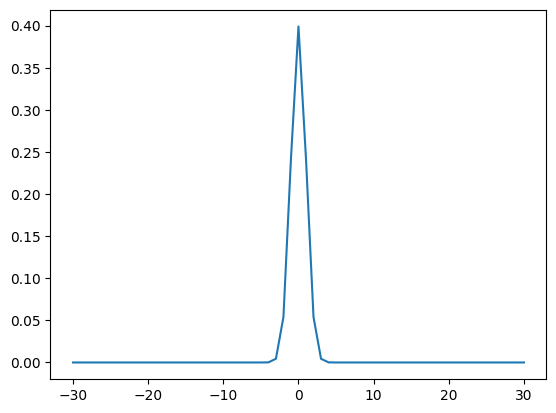

In [ ]:
plt.plot(x, y)

In [ ]:
sigma = 1
xx, yy = np.meshgrid(x, x)
r = np.sqrt(xx**2 + yy**2)
z1 = GaussianDistribution(r, 3, sigma)
z2 = GaussianDistribution(xx, 10, sigma) * GaussianDistribution(yy, 10, sigma/2)

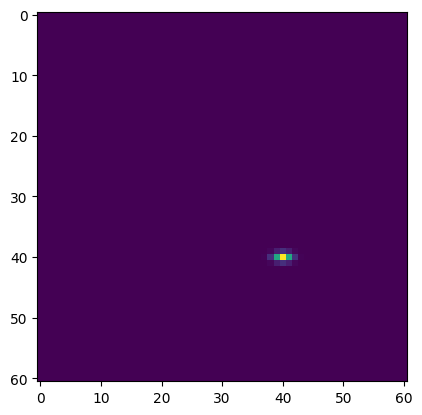

In [ ]:
plt.imshow(z2)

In [ ]:
z1.sum() / (2 * np.pi * 3)

0.9999857745191765

In [ ]:
z2.sum()

1.0000000000000002

# 2D Plot

In [29]:
x = np.arange(3) + 5
y = np.arange(3) + 6
xx, yy = np.meshgrid(x, y)

In [45]:
x1 = np.arange(4) + 5
y1 = np.arange(4) + 6

x2 = np.arange(5) + 5
y2 = np.arange(5) + 6

In [31]:
z = np.random.rand(3,3)
z

array([[0.47131556, 0.26816311, 0.66813092],
       [0.06104115, 0.25005321, 0.97852286],
       [0.09251371, 0.64782838, 0.38787126]])

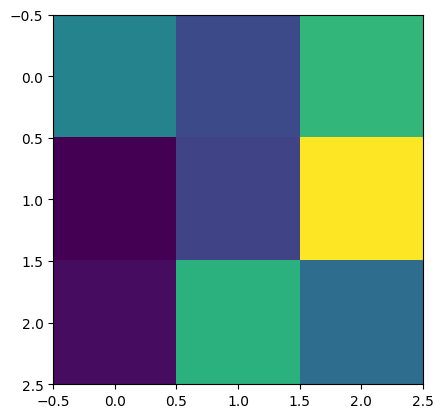

In [32]:
plt.imshow(z)

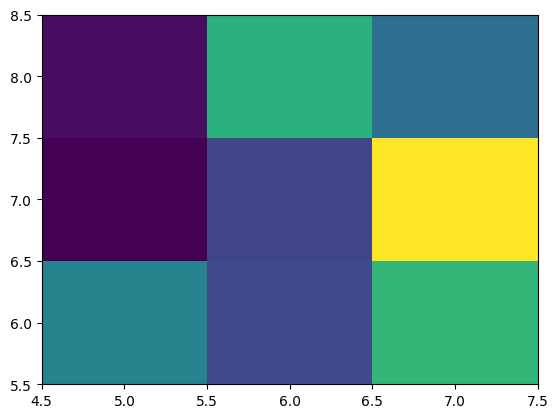

In [34]:
plt.pcolormesh(x, y, z)

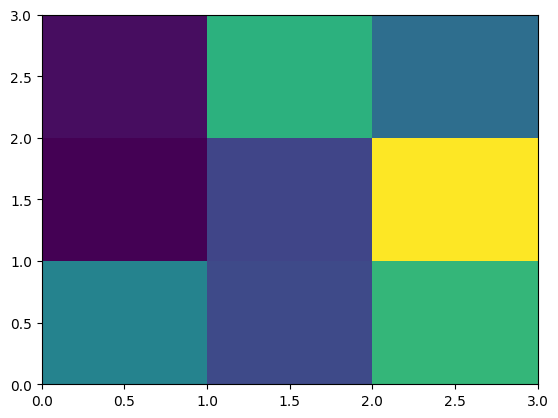

In [37]:
plt.pcolormesh(z)

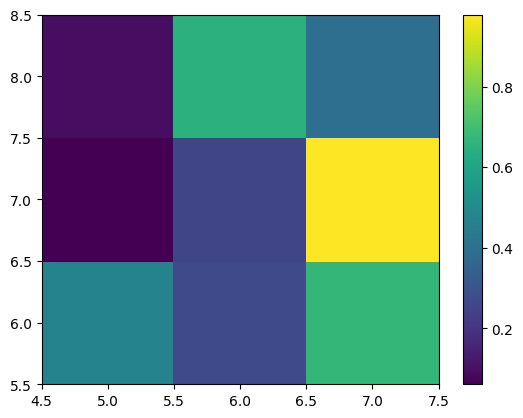

In [65]:
plt.pcolor(x,y, z)
plt.colorbar()

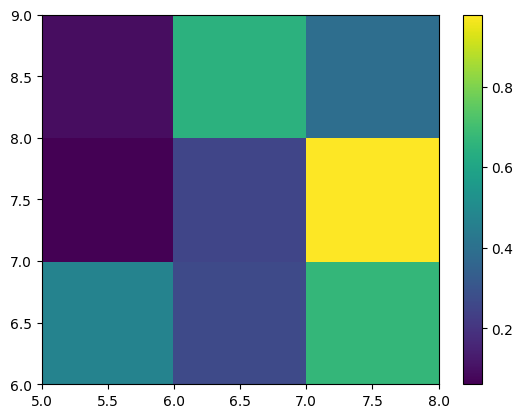

In [66]:
plt.pcolor(x1,y1, z)
plt.colorbar()

array([5, 6, 7, 8])

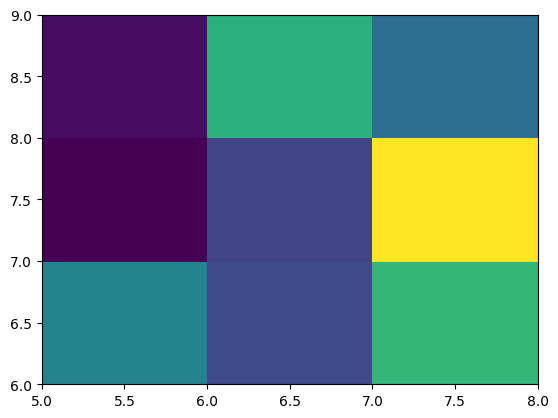

In [59]:
plt.pcolor(x1, y1, z, shading='auto')

ValueError: operands could not be broadcast together with shapes (3,3) (2,2) 

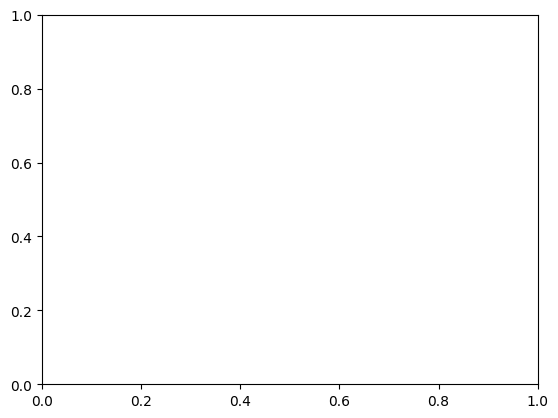

In [64]:
plt.pcolor(x, y, z, shading='gouraud')

In [48]:
a = np.random.rand(100)

In [53]:
np.histogram(a)

(array([13, 14,  6,  9,  5,  8, 12, 11,  8, 14]),
 array([0.00279028, 0.10145316, 0.20011604, 0.29877892, 0.39744181,
        0.49610469, 0.59476757, 0.69343045, 0.79209333, 0.89075622,
        0.9894191 ]))

(array([13., 14.,  6.,  9.,  5.,  8., 12., 11.,  8., 14.]),
 array([0.00279028, 0.10145316, 0.20011604, 0.29877892, 0.39744181,
        0.49610469, 0.59476757, 0.69343045, 0.79209333, 0.89075622,
        0.9894191 ]),
 <BarContainer object of 10 artists>)

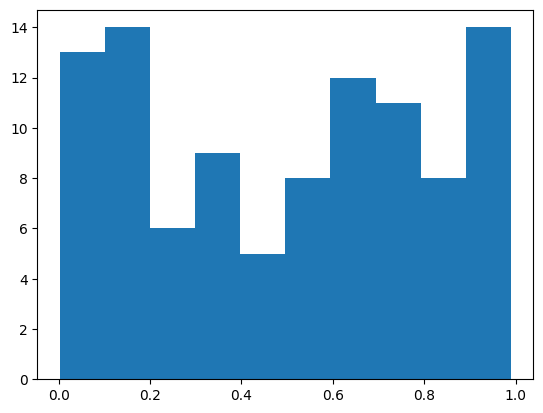

In [54]:
plt.hist(a)